In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2

In [25]:
image_path = '/mnt/d/projects/stock_v2510/src/bottom_reversal_breakout/dataset_3/image5.png'

In [26]:
image = cv2.imread(image_path)

In [27]:
image.shape

(530, 682, 3)

In [28]:
import cv2

# 获取原始高、宽
h, w = image.shape[:2]

# 定义目标尺寸
target_size = 768

# 计算缩放比例 (目标尺寸 / 最大边)
scale = target_size / max(h, w)

# 计算新的宽和高
new_w = int(w * scale)
new_h = int(h * scale)

# 进行缩放
# 因为是放大（从 682 放大到 768），建议使用 INTER_CUBIC 效果更好
image_resize = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_CUBIC)

print(f"原图尺寸: {w}x{h}")
print(f"新图尺寸: {new_w}x{new_h}")

原图尺寸: 682x530
新图尺寸: 768x596


In [29]:
image_resize.shape

(596, 768, 3)

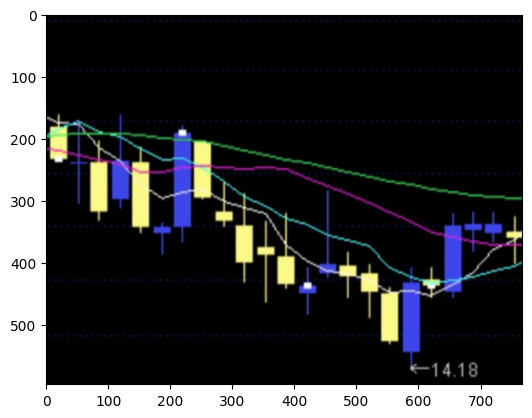

In [30]:
plt.imshow(image_resize)

In [31]:
cv2.imwrite(image_path.replace('.png','_resize.png'), image_resize)


True

In [37]:
x = np.arange(23)
y = np.random.randint(0, 20, x.shape)

In [38]:
x.shape,y.shape

((23,), (23,))

In [39]:
for x_i,y_i in zip(x,y):
    print(x_i,":",y_i,end="\t\t")
    if x_i % 5 == 4:
        print()

0 : 17		1 : 18		2 : 10		3 : 5		4 : 1		
5 : 5		6 : 1		7 : 11		8 : 12		9 : 11		
10 : 13		11 : 0		12 : 15		13 : 9		14 : 9		
15 : 9		16 : 12		17 : 3		18 : 2		19 : 10		
20 : 17		21 : 11		22 : 5		

(0.0, 20.0)

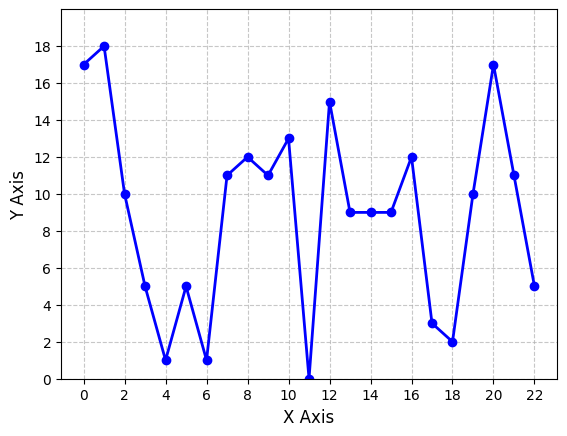

In [43]:
# 绘制折线图
plt.plot(x, y, 'bo-', linewidth=2, markersize=6)  # 蓝色带点的实线

# ==== 关键：添加网格线 ====
plt.grid(True, linestyle='--', alpha=0.7)  # 虚线网格，半透明

# 可选：美化设置
plt.xlabel('X Axis', fontsize=12)
plt.ylabel('Y Axis', fontsize=12)
plt.xticks(range(0, x.shape[0], 2))  # X轴刻度每5个单位显示
plt.yticks(range(0, np.max(y) + 2, 2))  # Y轴刻度每2个单位显示
plt.ylim(0, 20)  # Y轴范围

In [44]:
import pandas as pd

In [45]:
df = pd.read_excel("/mnt/d/projects/stock_v2510/data/temp1/600031.xls")

ValueError: Excel file format cannot be determined, you must specify an engine manually.

In [46]:
pip install yfinance pandas

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 25.1 MB/s  0:00:00 eta 0:00:01
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15636 sha256=9c604b9a3465732e268ac5eed0036ce63ed36278b4c9c144b3ad617c684da4aa
  Stored in directory: /home/shangong/.cache/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
Successfully built multitasking
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [yfinance]3/4 [yfinance]
Note: you may need to restart the kernel to use updated packages.


In [47]:
import yfinance as yf

# 1. 定义股票代码（注意后缀是 .SS）
ticker_symbol = "600031.SS"

# 2. 获取数据
# period: 时间范围 (1d, 5d, 1mo, 1y, ytd, max 等)
# interval: 时间间隔 (1m, 2m, 5m, 1h, 1d, 1wk 等)
data = yf.download(ticker_symbol, period="1y", interval="1d")

# 3. 查看数据
print("数据前 5 行：")
print(data.head())

# 4. 提取特定的列（如收盘价）
# 注意：yfinance 返回的是 pandas DataFrame
close_prices = data['Close']
print("\n最近 5 天收盘价：")
print(close_prices.tail())

[*********************100%***********************]  1 of 1 completed

数据前 5 行：
Price           Close       High        Low       Open    Volume
Ticker      600031.SS  600031.SS  600031.SS  600031.SS 600031.SS
Date                                                            
2024-12-25  15.858956  15.936317  15.771925  15.878297  28388364
2024-12-26  16.149061  16.168400  15.810607  15.820278  59492658
2024-12-27  16.081367  16.216750  16.033018  16.158728  42368888
2024-12-30  16.129721  16.187741  16.004008  16.052360  41851828
2024-12-31  15.936318  16.197411  15.936318  16.110380  51515564

最近 5 天收盘价：
Ticker      600031.SS
Date                 
2025-12-19  21.240000
2025-12-22  20.889999
2025-12-23  20.680000
2025-12-24  20.799999
2025-12-25  20.670000


In [ ]:
import yfinance as yf
import pandas as pd

# 1. 设置股票代码（三一重工）
ticker_symbol = "600031.SS"

# 2. 下载历史行情数据 (至少需要 60 天以上的数据来计算 MA60)
# auto_adjust=True 会自动处理复权
df = yf.download(ticker_symbol, period="1y", interval="1d", auto_adjust=True)

# 3. 计算均线 (Moving Averages)
# rolling(window=n) 表示计算过去 n 天的滑动窗口
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA60'] = df['Close'].rolling(window=60).mean()

# 4. 打印最后 10 行查看结果（包含均线）
print(df.tail(10))

# 5. 可选：保存到 Excel
# df.to_excel("600031_with_ma.xlsx")

[*********************100%***********************]  1 of 1 completed

Price           Close     MA5    MA20       MA60
Ticker      600031.SS                           
Date                                            
2025-12-12  21.320000  21.258  20.742  21.542900
2025-12-15  21.070000  21.226  20.767  21.546802
2025-12-16  20.760000  21.142  20.762  21.553102
2025-12-17  21.070000  21.062  20.777  21.564733
2025-12-18  21.000000  21.044  20.784  21.569935
2025-12-19  21.240000  21.028  20.833  21.582097
2025-12-22  20.889999  20.992  20.852  21.570339
2025-12-23  20.680000  20.976  20.864  21.560179
2025-12-24  20.799999  20.922  20.860  21.551196
2025-12-25  20.670000  20.856  20.887  21.529852
